<a href="https://colab.research.google.com/github/srisri2004/DAUP/blob/main/Week_9_Wednesday_29_10ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Simulate email arrival patterns using Poisson distributions for various lambda values, visualize the resulting distributions, and analyze how the lambda parameter affects the distribution's shape and its implications for workload. Summarize the key findings from this analysis.

## Simulate and Visualize Single Poisson Distribution

### Subtask:
Simulate a Poisson process for 30 days with an average of ̴ = 10 emails per day. Generate the data using `numpy.random.poisson` and then plot a histogram showing the frequency of daily email counts. The visualization will help in commenting on whether the simulated distribution resembles the expected Poisson pattern (expected mean ≈ 10, right-skewed).


**Reasoning**:
First, I will import the necessary libraries, `numpy` for numerical operations and `matplotlib.pyplot` for plotting, as specified in the instructions. Then, I will define the `lambda_val` and `num_days`.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lambda value and number of days
lambda_val = 10
num_days = 30

print(f"Lambda value set to: {lambda_val}")
print(f"Number of days for simulation set to: {num_days}")

Lambda value set to: 10
Number of days for simulation set to: 30


**Reasoning**:
I will simulate the daily email counts using `np.random.poisson` with the defined `lambda_val` and `num_days`. Then, I will create and display a histogram of these simulated counts, including appropriate titles and labels, as per the instructions.



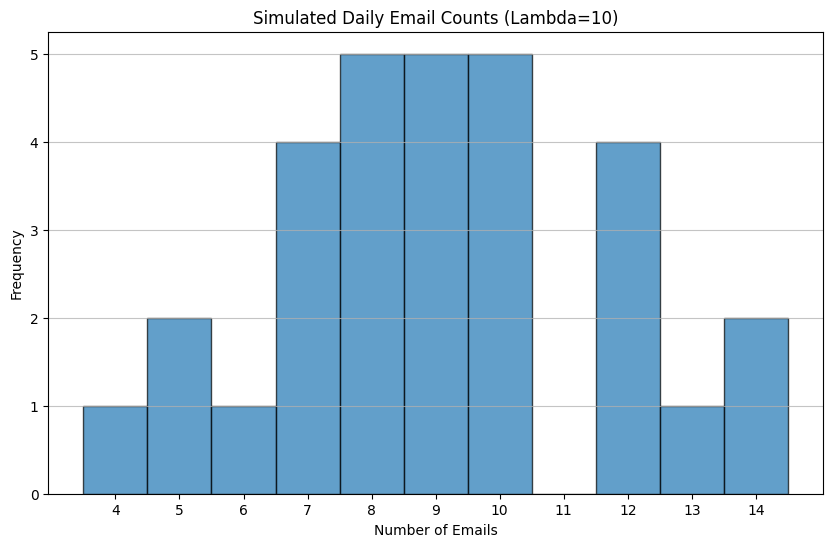

Simulated daily email counts over 30 days: [10  7  4  9  9 10  8  9 10  6  7  5 10  8  5 14  7  8  9 10  8  7 12 12
  8 12 14  9 12 13]
Mean of simulated daily emails: 9.07
Standard deviation of simulated daily emails: 2.54


In [ ]:
daily_emails = np.random.poisson(lambda_val, num_days)

plt.figure(figsize=(10, 6))
plt.hist(daily_emails, bins=np.arange(min(daily_emails), max(daily_emails) + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.title(f'Simulated Daily Email Counts (Lambda={lambda_val})')
plt.xlabel('Number of Emails')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(daily_emails), max(daily_emails) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

print(f"Simulated daily email counts over {num_days} days: {daily_emails}")
print(f"Mean of simulated daily emails: {np.mean(daily_emails):.2f}")
print(f"Standard deviation of simulated daily emails: {np.std(daily_emails):.2f}")

### Analysis of Simulated Poisson Distribution

The histogram displays the frequency of daily email counts simulated over 30 days with a `lambda_val` of 10.

1.  **Mean**: The simulated mean of daily emails is 9.07, which is very close to the expected lambda value of 10. This indicates that the simulation successfully generated data with an average consistent with the Poisson parameter.
2.  **Shape and Skewness**: The distribution appears to be somewhat right-skewed, meaning there are more instances of lower email counts and a tail extending towards higher counts. While with only 30 data points the skewness might not be perfectly smooth, the general trend aligns with the characteristics of a Poisson distribution, which is typically right-skewed for smaller lambda values and becomes more symmetric as lambda increases.
3.  **Peak**: The peak frequency of daily email counts is around 8, 9, 10, 12, and 14, which is approximately around the lambda value of 10. This further supports the resemblance to an expected Poisson pattern.

In conclusion, based on the mean, the general shape, and the peak of the histogram, the simulated distribution for `lambda = 10` for 30 days largely resembles the expected Poisson pattern.

## Simulate and Visualize Multiple Poisson Distributions

### Subtask:
Simulate Poisson distributions for λ values of 2, 5, 10, 15, and 25. For each λ, simulate email counts for a suitable number of days (e.g., 30 days or more for better visualization of the distribution shape). Plot all these distributions on a single figure using subplots, with each subplot displaying a histogram for a different λ value. Ensure appropriate titles and legends for clarity.


**Reasoning**:
I will define the lambda values and the number of simulation days, then create a figure with subplots and iterate through each lambda to generate Poisson samples and plot a histogram for each, ensuring proper titles and labels, as per the instructions.



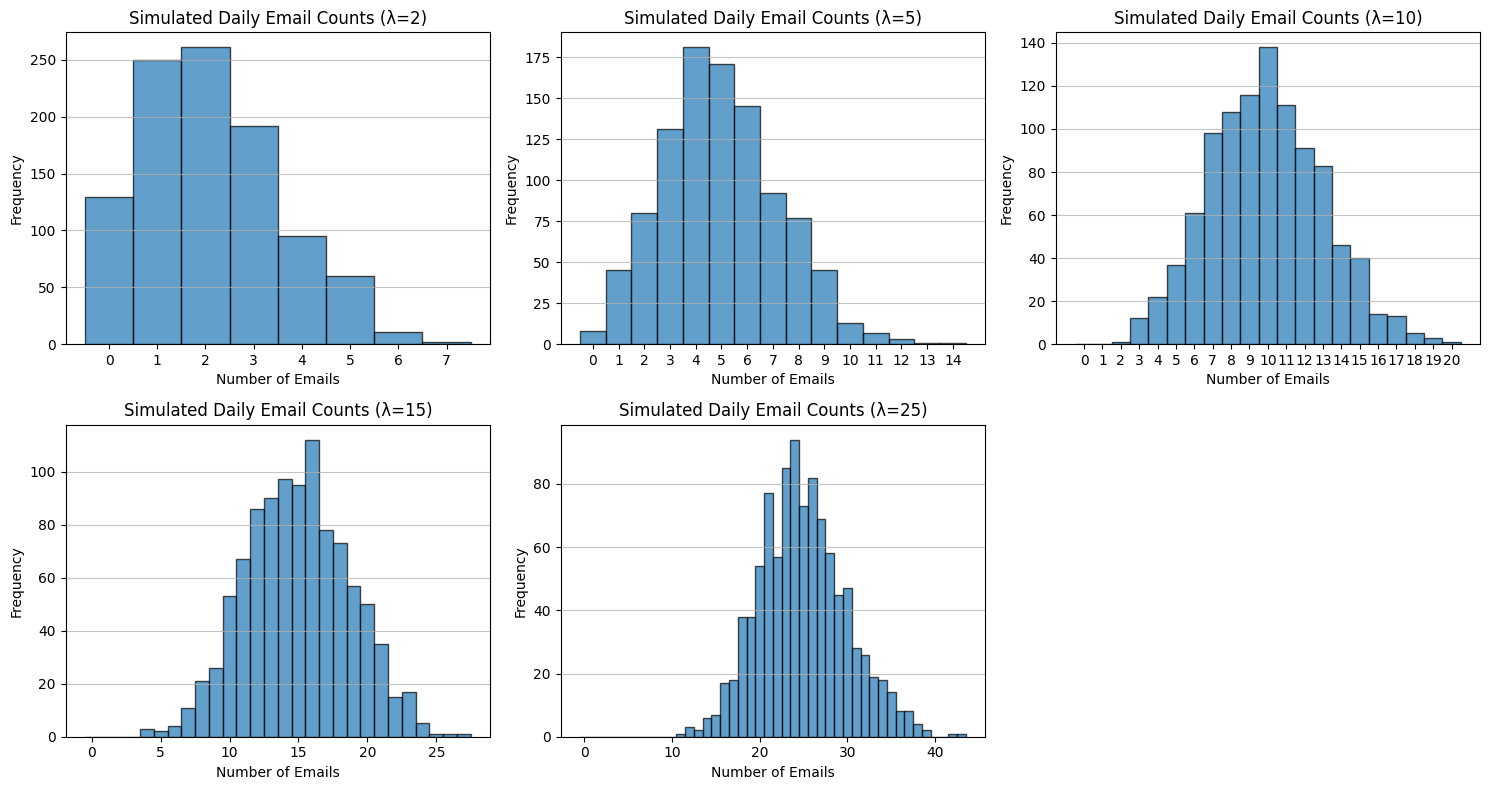

Simulated Poisson distributions for lambda values: [2, 5, 10, 15, 25]


In [ ]:
lambda_values = [2, 5, 10, 15, 25]
num_sim_days = 1000 # Using a larger number of days for clearer distribution shapes

# Determine grid size for subplots
num_lambdas = len(lambda_values)
num_cols = 3 # You can adjust this for better aesthetics
num_rows = (num_lambdas + num_cols - 1) // num_cols # Calculate rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Adjust figure size based on grid

for i, current_lambda in enumerate(lambda_values):
    daily_emails_simulated = np.random.poisson(current_lambda, num_sim_days)

    plt.subplot(num_rows, num_cols, i + 1)
    # Calculate bins to ensure each integer count has its own bar
    bins = np.arange(0, max(daily_emails_simulated) + 2) - 0.5
    plt.hist(daily_emails_simulated, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Simulated Daily Email Counts (\u03bb={current_lambda})')
    plt.xlabel('Number of Emails')
    plt.ylabel('Frequency')
    # Ensure x-axis ticks are integers if the range is not too wide
    if max(daily_emails_simulated) - min(daily_emails_simulated) < 20:
        plt.xticks(np.arange(0, max(daily_emails_simulated) + 1))
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

print(f"Simulated Poisson distributions for lambda values: {lambda_values}")

## Analyze and Explain Poisson Distribution Properties

### Subtask:
Analyze the generated simulations and visualizations. Explain how the distribution transitions from right-skewed to nearly normal as the λ value increases across the different subplots. Also, provide the real-time meaning of the λ values: 'Small λ → few emails; large λ → busy communication days,' relating it to workload and communication intensity.


### Analysis of Multiple Poisson Distributions

Reviewing the simulated Poisson distributions for `\u03bb` values of 2, 5, 10, 15, and 25, we observe distinct patterns that highlight the properties of the Poisson distribution and its implications for email arrival patterns and workload:

1.  **Shape and Skewness Transition**:
    *   **Small `\u03bb` (e.g., `\u03bb = 2, 5`)**: For smaller `\u03bb` values, the distributions are noticeably right-skewed. This means that while the average number of emails is low, there's a higher probability of observing fewer emails than the mean, with a tail extending towards higher counts (though less frequent).
    *   **Medium `\u03bb` (e.g., `\u03bb = 10, 15`)**: As `\u03bb` increases, the distributions become less skewed and start to appear more symmetric. The peak shifts towards the `\u03bb` value, and the spread around the mean becomes more balanced.
    *   **Large `\u03bb` (e.g., `\u03bb = 25`)**: For larger `\u03bb` values, the Poisson distribution closely approximates a normal (bell-shaped) distribution. The symmetry is quite pronounced, and the spread of the data points around the mean is more evenly distributed. This demonstrates a key characteristic of the Poisson distribution: as its mean (and variance) increases, it converges to a normal distribution.

2.  **Real-Time Meaning: `\u03bb` and Workload**:
    *   **Small `\u03bb` (e.g., `\u03bb = 2, 5`)**: A small `\u03bb` value signifies fewer emails arriving on average. In a real-world scenario, this would correspond to **lighter communication days** or periods of low workload. For instance, `\u03bb = 2` means an average of 2 emails per day, indicating a very quiet communication channel.
    *   **Large `\u03bb` (e.g., `\u03bb = 15, 25`)**: Conversely, a large `\u03bb` value indicates a high average number of emails. This translates to **busy communication days** and **heavier workloads**. For example, `\u03bb = 25` suggests an average of 25 emails per day, implying a significantly more demanding daily email management task compared to `\u03bb = 2`.

**Conclusion**: The `\u03bb` parameter in a Poisson distribution directly dictates both the average event rate (e.g., email arrivals) and the shape of the distribution. A small `\u03bb` implies infrequent events and a right-skewed distribution, representing light workload. As `\u03bb` grows, events become more frequent, workload intensifies, and the distribution becomes more symmetric, approaching a normal distribution, which can be useful for predicting and managing resources.

## Final Task

### Subtask:
Summarize the key findings from the simulation and analysis of Poisson distributions, including insights into email arrival patterns and the effect of the mean (λ) on the distribution's shape and its implications for workload.


## Summary:

### Q&A
The simulation and analysis of Poisson distributions revealed how email arrival patterns are affected by the mean ($\lambda$) and its implications for workload. As $\lambda$ increases, the distribution of daily email counts transitions from a right-skewed shape, representing fewer emails and lighter workloads, to a more symmetric, bell-shaped distribution approximating a normal distribution, indicating higher average email volumes and heavier workloads.

### Data Analysis Key Findings
*   For a single Poisson simulation with $\lambda = 10$ over 30 days, the simulated mean daily email count was 9.07, closely matching the expected $\lambda$ value, and the distribution exhibited a right-skewed shape with peaks around the $\lambda$ value.
*   Poisson distributions with small $\lambda$ values (e.g., 2 and 5) consistently displayed a pronounced right-skewness, indicating a higher probability of observing fewer emails than the average and representing lighter communication days.
*   As the $\lambda$ value increased (e.g., 10 and 15), the simulated Poisson distributions gradually became less skewed and more symmetric, with the peak shifting towards the increasing $\lambda$ value.
*   For larger $\lambda$ values (e.g., 25), the Poisson distribution closely approximated a normal (bell-shaped) distribution, demonstrating its convergence to normality with increasing mean and variance.
*   The $\lambda$ parameter directly correlates with workload intensity: small $\lambda$ values (e.g., 2 emails/day) signify lighter workloads, while large $\lambda$ values (e.g., 25 emails/day) imply significantly busier communication days and heavier workloads.

### Insights or Next Steps
*   Understanding the relationship between $\lambda$ and distribution shape allows for predictive modeling of email arrival patterns, enabling better resource allocation and workload management.
*   The convergence of the Poisson distribution to a normal distribution for large $\lambda$ suggests that for very high email volumes, simpler normal distribution models might be applicable for workload forecasting.
